# Analise de dados sobre densidade

In [47]:
import numpy as np

In [48]:
volumes = np.array([0.37, 0.60, 0.83, 1.05]) # Em mL
print(volumes)

[0.37 0.6  0.83 1.05]


In [49]:
massa = np.array([1.075, 1.675, 2.229, 2.795]) # Em kg
print(massa)

[1.075 1.675 2.229 2.795]


In [50]:
df_density = np.array([volumes, massa])

In [51]:
import pandas as pd

df_density = pd.read_csv('data.csv', delimiter=',', header='infer')
df_density

,Volumes,Massa
0,0.40,1.075
1,0.60,1.678
2,0.83,2.229
3,1.05,2.795


In [52]:
densitys = df_density.Massa/df_density.Volumes
densitys

0    2.687500
1    2.796667
2    2.685542
3    2.661905
dtype: float64

In [53]:
densitys.mean()

2.707903399311532

In [54]:
for col_name in ['Massa','Volumes']:
    col = df_density[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Massa:
 - Range: 1.72
 - Variance: 0.54
 - Std.Dev: 0.74

Volumes:
 - Range: 0.65
 - Variance: 0.08
 - Std.Dev: 0.28


In [55]:
print(f'As medidas de densidade estão 68% dentro de {round(densitys.mean()-densitys.std(), 2)} e {round(densitys.mean()+densitys.std(), 2)}')

As medidas de densidade estão 68% dentro de 2.65 e 2.77


<Axes: title={'center': 'Densidade'}, xlabel='Volumes', ylabel='Massa'>

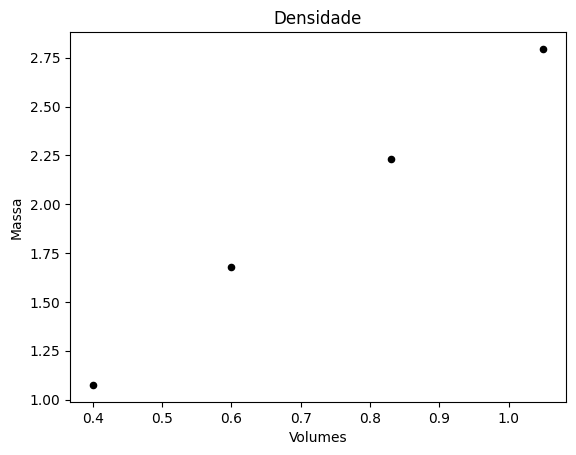

In [56]:
df_density.plot.scatter(title='Densidade', x='Volumes', y='Massa', color='black')

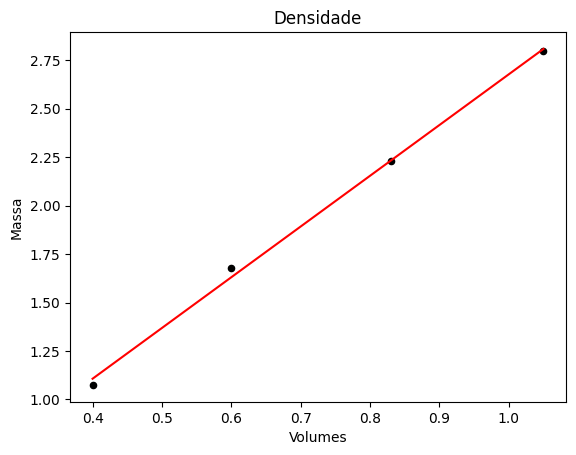

Coeficiente angular da reta: 2.616400336417157
Valor de y onde a reta intecepta o eixo y: 0.06044175777964722


In [57]:
from matplotlib import pyplot as plt
from scipy import stats

df_regression = df_density[['Massa','Volumes']].copy()

m, b, r, p, e = stats.linregress(df_regression['Volumes'], df_regression['Massa'])

df_regression['fx'] = (m*df_regression['Volumes']) + b

df_regression['error'] = df_regression['fx'] - df_regression['Volumes']

df_regression.plot.scatter(title='Densidade', x='Volumes', y='Massa', color='black')

plt.plot(df_regression['Volumes'], df_regression['fx'], color='red')

plt.show()

print(f"Coeficiente angular da reta: {m}\nValor de y onde a reta intecepta o eixo y: {b}")

In [58]:
from sklearn.metrics import r2_score

# Cálculo do coeficiente de determinação R^2
r2 = r2_score(df_regression['Massa'], df_regression['fx'])
print(f"Coeficiente de determinação R^2: {round(r2, 3)}")

Coeficiente de determinação R^2: 0.998


In [59]:
def predict(x):
    m = 2.616400336417157
    b = 0.06044175777964722
    return m*x+b

prediction = predict(2)

round(prediction, 3)

5.293